In [1]:
from os import listdir
import numpy as np
from matplotlib import image
import cv2
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

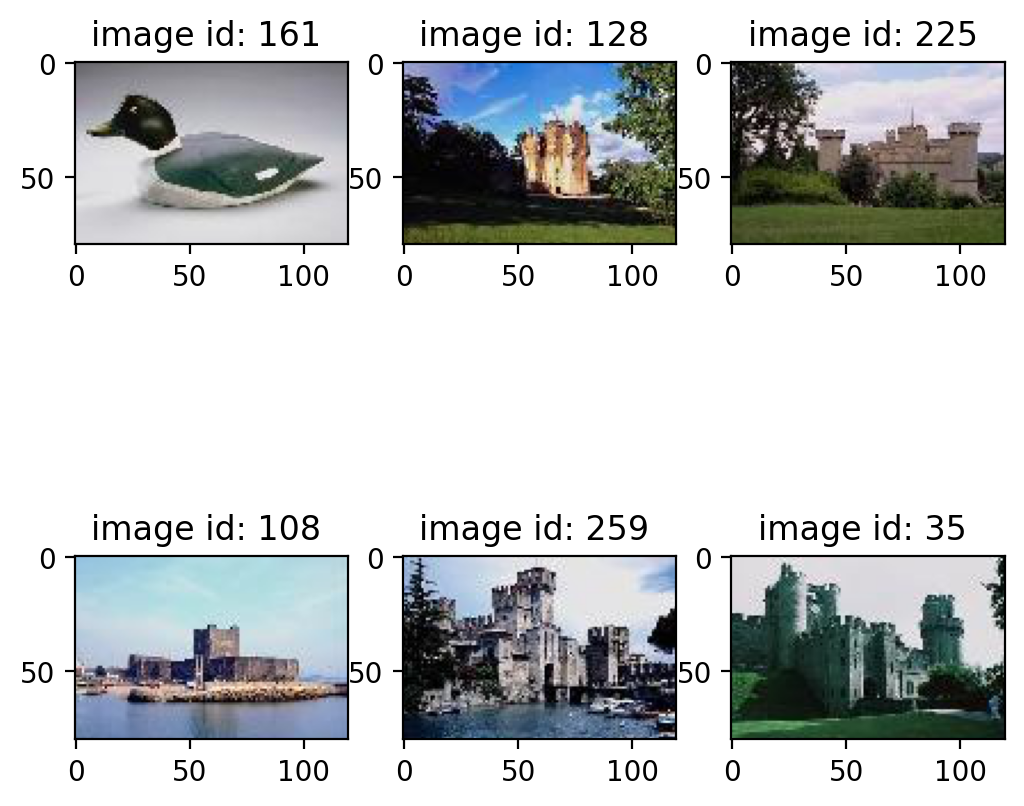

In [2]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

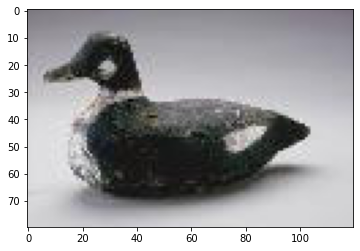

In [3]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/img.jpg')
plt.imshow(img_requete)

In [4]:
#image = cv2.cvtColor(img_requete, cv2.COLOR_BGR2HSV)

In [5]:
#for i in range (len(loaded_images)):
        #loaded_images[i] = cv2.cvtColor(loaded_images[i], cv2.COLOR_BGR2HSV)
     

In [15]:
def CBIR_Indexation():
    images = list()
    features=np.zeros([len(loaded_images),32])
    
    for i in range (len(loaded_images)):
        images.append(cv2.cvtColor(loaded_images[i], cv2.COLOR_BGR2HSV))
        hist = cv2.calcHist([images[i]],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
        hist = cv2.normalize(hist,None).flatten()
        features[i]=hist
    return features

In [16]:
CBIR_Indexation()

array([[1.49862960e-01, 8.51221561e-01, 1.70613211e-02, ...,
        2.69753318e-02, 2.99725914e-03, 0.00000000e+00],
       [1.64571626e-03, 2.18174964e-01, 2.35102329e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68147662e-02, 2.33011067e-01, 6.78074546e-03, ...,
        0.00000000e+00, 1.23286282e-03, 0.00000000e+00],
       ...,
       [1.50448442e-01, 1.84800312e-01, 6.71133623e-02, ...,
        7.63374753e-03, 1.14506213e-02, 0.00000000e+00],
       [2.97394637e-02, 3.44781697e-01, 2.22228952e-02, ...,
        3.26807291e-04, 1.30722916e-03, 0.00000000e+00],
       [7.59832337e-02, 7.37569749e-01, 6.53359015e-03, ...,
        3.14580253e-03, 2.41984817e-04, 0.00000000e+00]])

In [17]:
ImgReq=cv2.cvtColor(img_requete, cv2.COLOR_BGR2HSV)
imreq = cv2.calcHist([ImgReq],[0,1,2],None,[8,2,2],[0,180,0,256,0,256]).flatten()


In [18]:
index_Matrix=CBIR_Indexation()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)
print(index_Matrix)

(270, 32)
[[1.49862960e-01 8.51221561e-01 1.70613211e-02 ... 2.69753318e-02
  2.99725914e-03 0.00000000e+00]
 [1.64571626e-03 2.18174964e-01 2.35102329e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.68147662e-02 2.33011067e-01 6.78074546e-03 ... 0.00000000e+00
  1.23286282e-03 0.00000000e+00]
 ...
 [1.50448442e-01 1.84800312e-01 6.71133623e-02 ... 7.63374753e-03
  1.14506213e-02 0.00000000e+00]
 [2.97394637e-02 3.44781697e-01 2.22228952e-02 ... 3.26807291e-04
  1.30722916e-03 0.00000000e+00]
 [7.59832337e-02 7.37569749e-01 6.53359015e-03 ... 3.14580253e-03
  2.41984817e-04 0.00000000e+00]]


In [19]:

import scipy.spatial.distance as dist

def CBIR_Recherche(Imreq,ind_Matrix):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance
    
  

In [20]:


print(imreq)

distanes_CBIR=CBIR_Recherche(imreq,index_Matrix)




[5.720e+02 2.380e+03 0.000e+00 0.000e+00 1.640e+02 1.900e+01 2.000e+00
 0.000e+00 4.970e+02 4.000e+01 7.000e+00 0.000e+00 5.380e+02 5.700e+01
 2.000e+00 0.000e+00 7.210e+02 2.170e+02 4.000e+00 0.000e+00 7.100e+01
 1.070e+02 1.000e+00 0.000e+00 1.200e+02 1.710e+02 0.000e+00 0.000e+00
 1.080e+02 3.802e+03 0.000e+00 0.000e+00]


In [21]:
distanes_CBIR

{162: 4652.401551598961,
 161: 4652.425587727975,
 203: 4652.428923099629,
 207: 4652.431965602812,
 165: 4652.434078331154,
 166: 4652.434894476036,
 137: 4652.440779802069,
 183: 4652.445688532839,
 197: 4652.446504982897,
 164: 4652.452199793594,
 186: 4652.454245089241,
 168: 4652.458374705037,
 154: 4652.461151915688,
 204: 4652.468484971444,
 141: 4652.482246604923,
 167: 4652.483166051769,
 172: 4652.4841117424485,
 144: 4652.492482643843,
 160: 4652.507099952579,
 174: 4652.512585338931,
 145: 4652.517811562906,
 175: 4652.518562785453,
 205: 4652.52071283844,
 208: 4652.532379367248,
 142: 4652.533082097937,
 75: 4652.535963988646,
 200: 4652.570379980165,
 180: 4652.593450480541,
 181: 4652.593924214176,
 103: 4652.606752579246,
 152: 4652.609455196522,
 171: 4652.638061931982,
 67: 4652.640085166361,
 147: 4652.647188740967,
 148: 4652.651839915841,
 193: 4652.653620584562,
 218: 4652.6559216404285,
 79: 4652.662615753404,
 140: 4652.669393622434,
 187: 4652.671149997583,
 3

In [22]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance = np.array(data)
  
# print the numpy array
print(arraydistance)

[162 161 203 207 165 166 137 183 197 164 186 168 154 204 141 167 172 144
 160 174 145 175 205 208 142  75 200 180 181 103 152 171  67 147 148 193
 218  79 140 187  36 215 113 212  60  89 211 214   6  34  41  72 157 110
  86 192 259 179 178 158 213 247 243 155 170  94 209 241  65 199 194  80
 151  26  99  32 182 265 225  35 195 217   0 219  24 149  62 159  20 101
 196 100 222 173 263  23 210 129 202 233  91 216 156 150  84  98  11  21
   4  64 191 177  58 139 189 122 269 169  78  56  49 130  93 135  47 198
  18  82 120 264  81  17 235  54 123 220 136  10 266  57 201 253 109  53
  63 163 206 132 238 257 221 108  59 131 127  44 234  27 232 106  16 224
 255  33  83 143 226 251  95  42  51   7  29  77 227 258 184 239 248 228
  22   8  14 128 121  69 229   5 185 256  52 125  15 134 246 268 250 153
  25 138  66  55  38 126 118  73  61  43 105 102 176  85 115 188  97 254
 190 146  28 249  31 260 267 124  40  74  88 117  30 230   1 244   2 133
  19 245  37 240 231  50  46  12 236  48  45  39  1

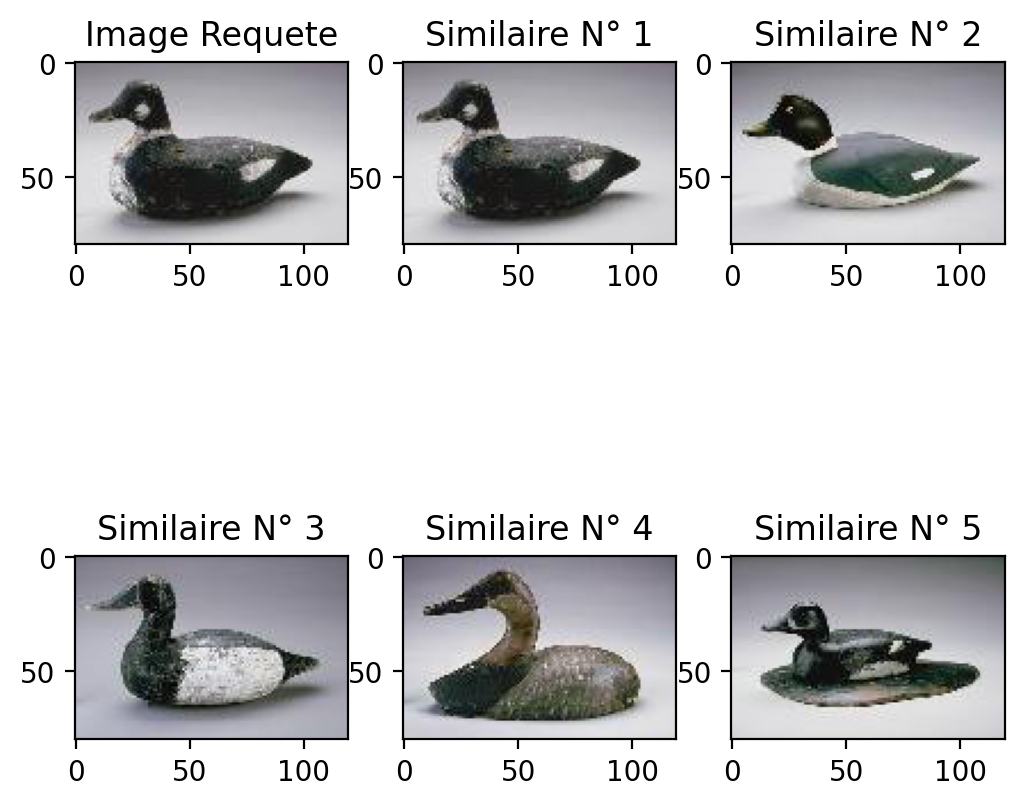

In [23]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[arraydistance[i]])
  ax1.set_title('Similaire N° %s' %(i+1))